In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from numba import jit
import copy
import tqdm
plt.style.use('dark_background')

In [2]:
# import files from above directory
import os
import sys
import importlib  

parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    # make sure it is added on top to load first in 
    # case there is name conflict with the py files
    sys.path.insert(0,parent_dir)

try:
    importlib.reload(models)
    importlib.reload(bt)
except NameError:
    import models
    import bt

** Gaussian **
Mean
[0.00019588 0.00020101]
Covariance
[[1.03242658e-04 8.12311481e-06]
 [8.12311481e-06 1.00297110e-04]]


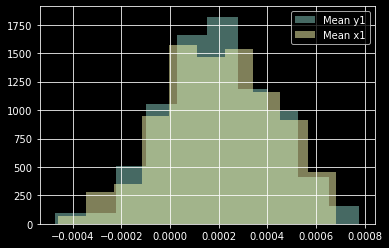

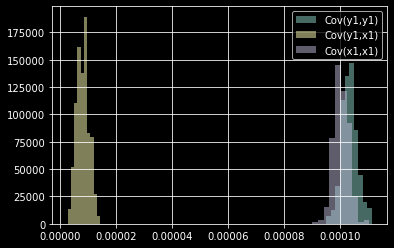

-> ACCEPT STRATEGY

** Performance summary **

Return:  0.07514372207191763
Standard deviation:  0.06969228145803417
Sharpe:  1.078221583507294

Return fee=0:  0.07514372207191763
Standard deviation fee=0:  0.06969228145803417
Sharpe fee=0:  1.078221583507294

**


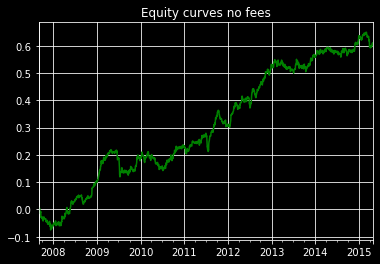

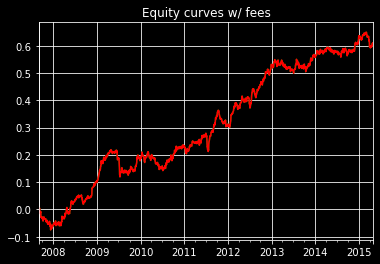

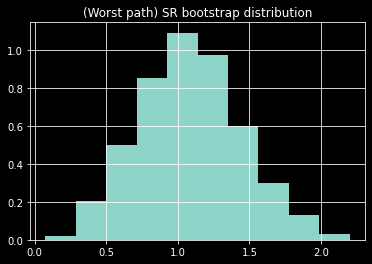

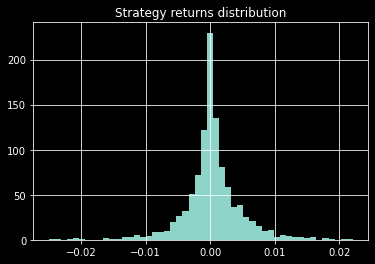

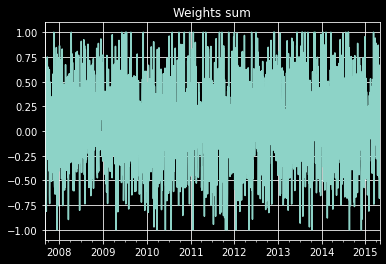

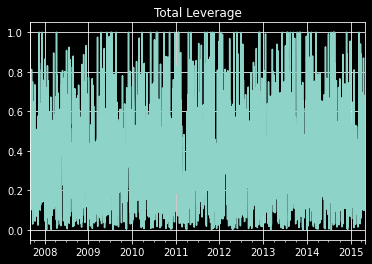

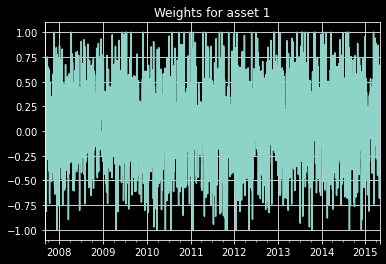

In [4]:
# Linear regression/gaussian/gaussian mixture
# Test the train test!

# generate data
n=2000
a=0
b=0.1

x=np.random.normal(0,0.01,n)
y=a+b*x+np.random.normal(0,0.01,n)
dates=pd.date_range('2000-01-01',periods=n,freq='B')
data_train=pd.DataFrame(np.hstack((y[:,None],x[:,None])),columns=['y1','x1'],index=dates)

x=np.random.normal(0,0.01,n)
y=a+b*x+np.random.normal(0,0.01,n)
dates=pd.date_range(dates[-1],periods=n+1,freq='B')[1:]
data_test=pd.DataFrame(np.hstack((y[:,None],x[:,None])),columns=['y1','x1'],index=dates)

# run model
model=models.ConditionalGaussian(n_gibbs=250)
infer=bt.Inference(
                        k_folds=5,
                        burn_f=0.1,
                        n_paths=5,   
                        )
trained_model=infer.train(data_train,model)

out=infer.test(data_test,trained_model)
out.post_process()

 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00, 16.80it/s]

                  y1        x1
2000-01-03 -0.010843 -0.012442
2000-01-04 -0.018714  0.002679
2000-01-05  0.007211 -0.016853
2000-01-06  0.011496  0.004299
2000-01-07 -0.002259 -0.013383
...              ...       ...
2007-08-27  0.015434 -0.004671
2007-08-28  0.000949  0.012545
2007-08-29  0.011986 -0.009989
2007-08-30  0.007226 -0.014525
2007-08-31  0.004440 -0.018779

[2000 rows x 2 columns]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.28it/s]


-> REJECT STRATEGY

** Performance summary **

Return:  0.08648212795104797
Standard deviation:  0.09599109917657164
Sharpe:  0.9009390317738489

Return fee=0:  0.08648212795104797
Standard deviation fee=0:  0.09599109917657164
Sharpe fee=0:  0.9009390317738489

**


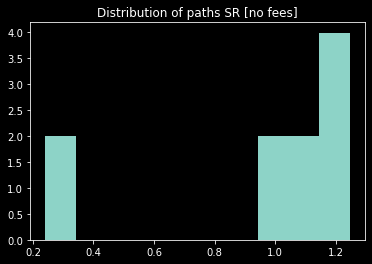

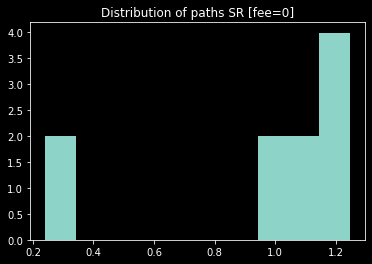

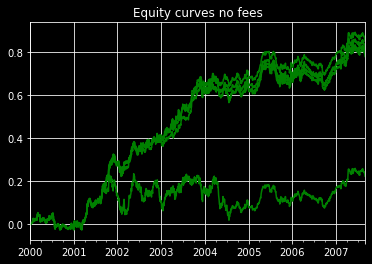

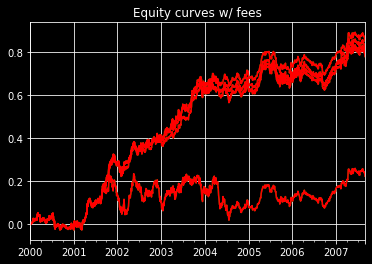

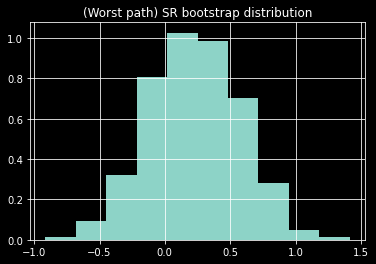

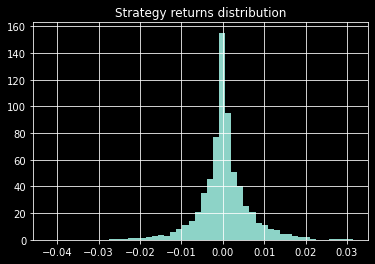

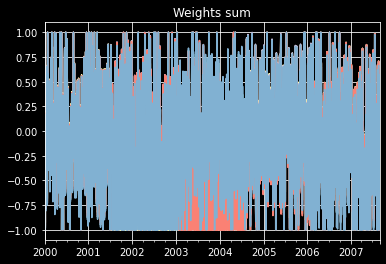

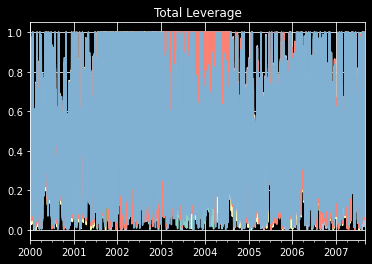

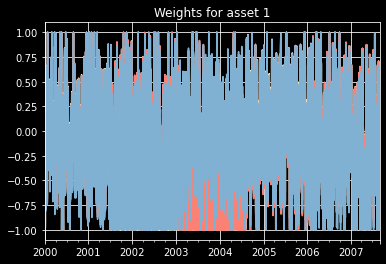

In [8]:
# Linear regression/gaussian/gaussian mixture

# generate data
n=2000
x=np.random.normal(0,0.01,n)
a=0
b=0.1
y=a+b*x+np.random.normal(0,0.01,n)
dates=pd.date_range('2000-01-01',periods=n,freq='B')
data=pd.DataFrame(np.hstack((y[:,None],x[:,None])),columns=['y1','x1'],index=dates)

print(data)

# run model
model=models.ConditionalGaussian(n_gibbs=None)
infer=bt.Inference(
                        k_folds=5,
                        burn_f=0.1,
                        n_paths=5,   
                        )
out=infer.cvbt(data,model)
out.post_process()